In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%pip install tabulate

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\emada\appdata\local\programs\python\python311\lib\site-packages\googletrans-3.0.0-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [2]:
# Load your dataset
df = pd.read_csv("IotFinalDataset.csv")

# Count instances per class
class_distribution = df["Label"].value_counts().reset_index()
class_distribution.columns = ["Class Name", "Number of Instances"]

# Add percentage column for clarity (IEEE papers often include this)
total = class_distribution["Number of Instances"].sum()
class_distribution["Percentage"] = (
    class_distribution["Number of Instances"] / total * 100
).round(2)

# Display the table
print(class_distribution.to_markdown(index=False))


| Class Name         |   Number of Instances |   Percentage |
|:-------------------|----------------------:|-------------:|
| Port Scan          |                441260 |        35.52 |
| Benign             |                327505 |        26.36 |
| ICMP Flood         |                225234 |        18.13 |
| Ping Sweep         |                 71928 |         5.79 |
| DNS Flood          |                 46934 |         3.78 |
| Vulnerability Scan |                 39533 |         3.18 |
| OS Scan            |                 37524 |         3.02 |
| Slowloris          |                 18537 |         1.49 |
| SYN Flood          |                 13857 |         1.12 |
| UDP Flood          |                 10000 |         0.8  |
| Dictionary Attack  |                 10000 |         0.8  |


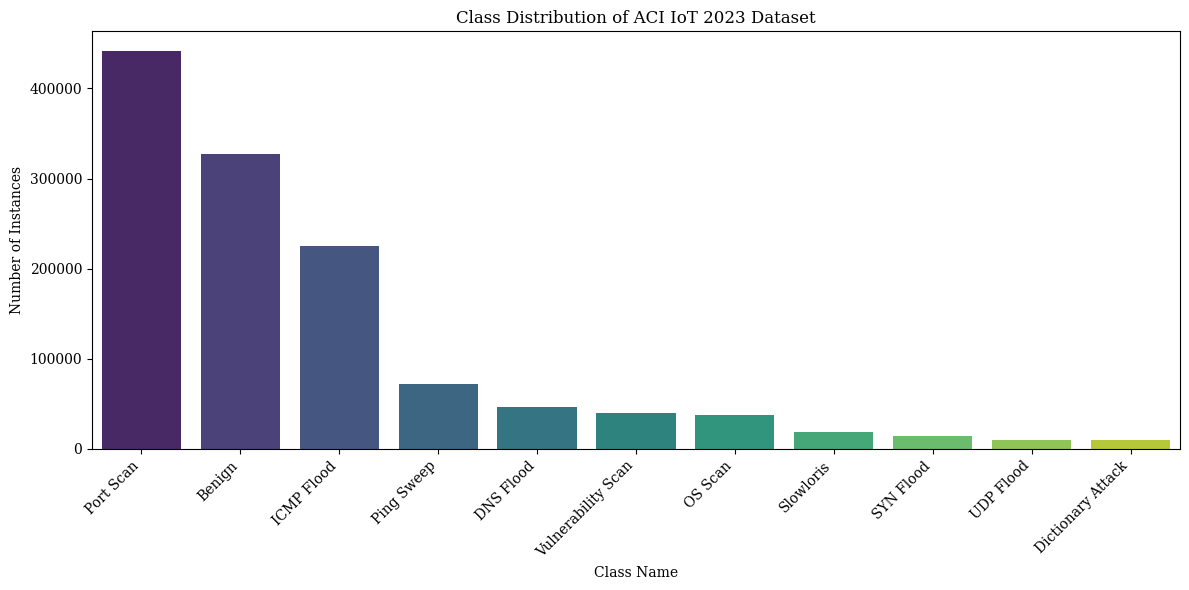

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings (IEEE-friendly: Times New Roman font, high resolution)
plt.rcParams["font.family"] = "serif"
plt.figure(figsize=(12, 6))
sns.barplot(
    x="Class Name", y="Number of Instances", data=class_distribution, palette="viridis"
)

# Rotate labels for readability
plt.xticks(rotation=45, ha="right")
plt.title("Class Distribution of ACI IoT 2023 Dataset")
plt.ylabel("Number of Instances")
plt.tight_layout()

# Save for inclusion in the paper
plt.savefig("class_distribution.png", dpi=300, bbox_inches="tight")
plt.show()

In [1]:
import pandas as pd

# Load the dataset
file_path = "IotFinalDataset.csv"
df = pd.read_csv(file_path)

# Total rows and columns
print("Dataset Shape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())


Dataset Shape: (1242312, 35)

Columns: ['Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Length of Fwd Packet', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Fwd IAT Std', 'Bwd IAT Mean', 'Bwd IAT Std', 'Packet Length Max', 'Packet Length Mean', 'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'Down/Up Ratio', 'Bwd Bulk Rate Avg', 'FWD Init Win Bytes', 'Bwd Init Win Bytes', 'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Idle Mean', 'Idle Std', 'Idle Max', 'Connection Type', 'Label']

Missing Values per Column:
Protocol                      0
Flow Duration                 0
Total Fwd Packet              0
Total Length of Fwd Packet    0
Fwd Packet Length Max         0
Fwd Packet Length Min         0
Bwd Packet Length Max         0
Bwd Packet Length Min         0
Flow Bytes/s                  0
Flow

In [2]:
# Assuming 'Label' is the target column
target_column = "Label"

# Class distribution
print("\nClass Distribution:")
print(df[target_column].value_counts())

# Percentage breakdown
print("\nClass Distribution (%):")
print(df[target_column].value_counts(normalize=True) * 100)


Class Distribution:
Label
Port Scan             441260
Benign                327505
ICMP Flood            225234
Ping Sweep             71928
DNS Flood              46934
Vulnerability Scan     39533
OS Scan                37524
Slowloris              18537
SYN Flood              13857
UDP Flood              10000
Dictionary Attack      10000
Name: count, dtype: int64

Class Distribution (%):
Label
Port Scan             35.519258
Benign                26.362540
ICMP Flood            18.130228
Ping Sweep             5.789850
DNS Flood              3.777956
Vulnerability Scan     3.182212
OS Scan                3.020497
Slowloris              1.492137
SYN Flood              1.115420
UDP Flood              0.804951
Dictionary Attack      0.804951
Name: proportion, dtype: float64


In [3]:
# Basic stats for numerical columns
print("\nFeature Statistics:")
print(df.describe())

# Data types of columns
print("\nData Types:")
print(df.dtypes)


Feature Statistics:
           Protocol  Flow Duration  Total Fwd Packet  \
count  1.242312e+06   1.242312e+06      1.242312e+06   
mean   6.508061e+00   5.236924e+06      5.441429e+00   
std    4.976577e+00   1.187986e+07      1.812002e+02   
min    0.000000e+00   1.000000e+00      1.000000e+00   
25%    6.000000e+00   3.364000e+03      1.000000e+00   
50%    6.000000e+00   6.656000e+03      1.000000e+00   
75%    6.000000e+00   3.117256e+06      2.000000e+00   
max    1.700000e+01   6.094632e+07      7.418000e+04   

       Total Length of Fwd Packet  Fwd Packet Length Max  \
count                1.242312e+06           1.242312e+06   
mean                 4.958543e+03           1.071115e+02   
std                  4.562733e+05           8.264563e+02   
min                  0.000000e+00           0.000000e+00   
25%                  0.000000e+00           0.000000e+00   
50%                  0.000000e+00           0.000000e+00   
75%                  2.800000e+01           2.400000e+

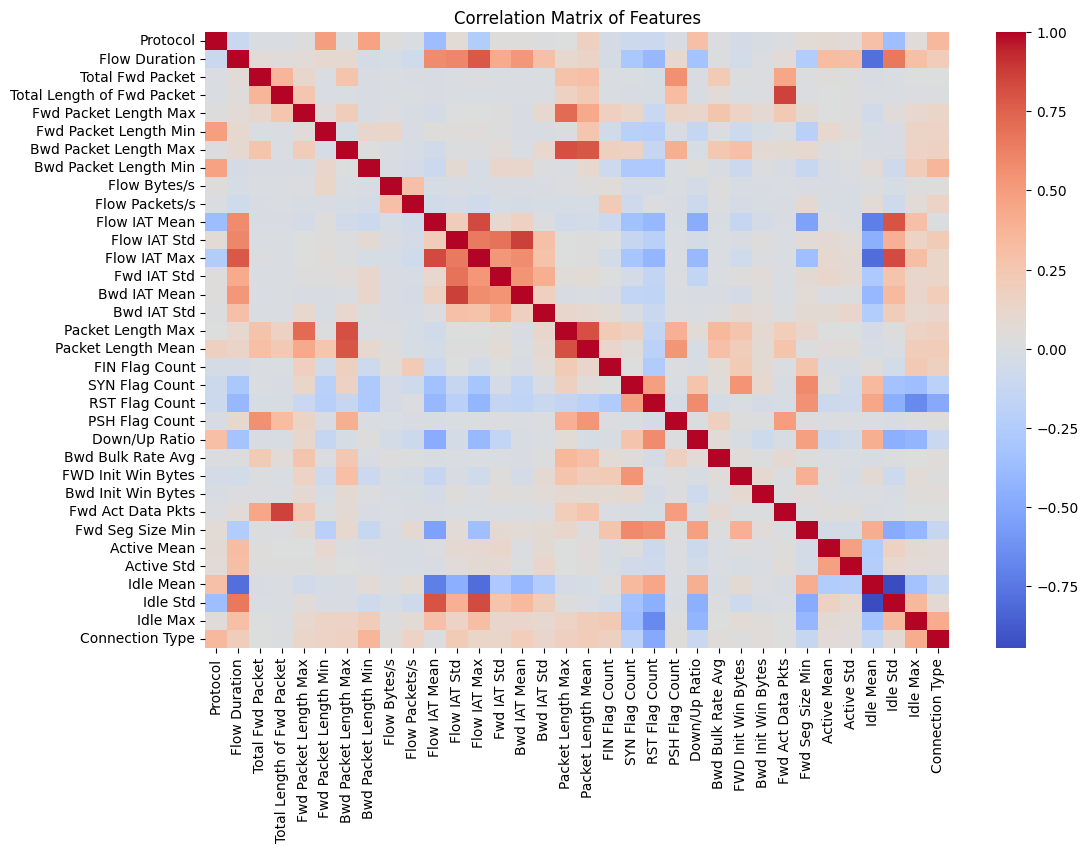


Highly Correlated Pairs (|corr| > 0.9):
('Idle Mean', 'Idle Std', -0.9437564558583984)
('Idle Std', 'Idle Mean', -0.9437564558583984)


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Compute correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

# Find highly correlated pairs (e.g., > 0.9)
threshold = 0.9
high_corr = np.where(np.abs(corr_matrix) > threshold)
high_corr_pairs = [
    (corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
    for x, y in zip(*high_corr)
    if x != y
]
print("\nHighly Correlated Pairs (|corr| > 0.9):")
for pair in high_corr_pairs:
    print(pair)